In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [2]:
import datetime
from scipy import stats

In [3]:
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [5]:
data['holiday'].value_counts()

None                         48143
Labor Day                        7
New Years Day                    6
Martin Luther King Jr Day        6
Christmas Day                    6
Thanksgiving Day                 6
Independence Day                 5
State Fair                       5
Memorial Day                     5
Veterans Day                     5
Washingtons Birthday             5
Columbus Day                     5
Name: holiday, dtype: int64

dari data diatas terlihat bahwa hari minggu tidak termasuk dalam hari libur, sehingga perlu untuk ditambahkan

In [6]:
data[data['holiday']!='None']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22 00:00:00,919
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04 00:00:00,1021
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962


In [7]:
data[data['holiday']=='Labor Day']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8742,Labor Day,288.78,0.00,0.0,0,Clear,Sky is Clear,2013-09-02 00:00:00,1041
18041,Labor Day,295.02,0.00,0.0,90,Clouds,overcast clouds,2015-09-07 00:00:00,973
26319,Labor Day,293.17,1.52,0.0,90,Rain,moderate rain,2016-09-05 00:00:00,1064
26320,Labor Day,293.17,1.52,0.0,90,Thunderstorm,proximity thunderstorm,2016-09-05 00:00:00,1064
36882,Labor Day,295.54,0.00,0.0,1,Clear,sky is clear,2017-09-04 00:00:00,1026
47330,Labor Day,292.43,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962
47331,Labor Day,292.43,0.25,0.0,1,Mist,mist,2018-09-03 00:00:00,962


dari kolom 'holiday' terdapat perbandingan yang jauh antara 'None' dengan nilai yang lain. Hal ini disebabkan karena ada kesalahan pada data. dari tabel terlihat bahwa untuk nilai selain 'None' semuanya hanya tercatat pada pukul 00:00:00. contoh pada "Labor Day'. 'Labor Day' hanya ada pada pukul 00:00:00 sementara pada tanggal yang sama di waktu yang berbeda nilai kolom 'holiday' adalah 'None'. Sehingga data perlu untuk diperbaiki.   

### Persiapan Data

In [8]:
data['date_time']=pd.to_datetime(data['date_time'])

In [9]:
data['waktu'] = [x.time() for x in data['date_time']]
data['tanggal'] = [x.date() for x in data['date_time']]

In [10]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,waktu,tanggal
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,09:00:00,2012-10-02
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10:00:00,2012-10-02
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11:00:00,2012-10-02
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12:00:00,2012-10-02
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13:00:00,2012-10-02


In [11]:
data['hari']=data['date_time'].dt.day_name()
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,waktu,tanggal,hari
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,09:00:00,2012-10-02,Tuesday
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10:00:00,2012-10-02,Tuesday
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11:00:00,2012-10-02,Tuesday
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12:00:00,2012-10-02,Tuesday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13:00:00,2012-10-02,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19:00:00,2018-09-30,Sunday
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20:00:00,2018-09-30,Sunday
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21:00:00,2018-09-30,Sunday
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22:00:00,2018-09-30,Sunday


In [12]:
#data[(data['hari']==6)& (data['holiday']=='None')]
data[(data['hari']=='Sunday')& (data['holiday']=='None')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,waktu,tanggal,hari
104,None,276.11,0.0,0.0,75,Clouds,broken clouds,2012-10-07 00:00:00,1233,00:00:00,2012-10-07,Sunday
105,None,275.73,0.0,0.0,90,Clouds,overcast clouds,2012-10-07 03:00:00,323,03:00:00,2012-10-07,Sunday
106,None,275.65,0.0,0.0,90,Clouds,overcast clouds,2012-10-07 04:00:00,312,04:00:00,2012-10-07,Sunday
107,None,275.51,0.0,0.0,75,Clouds,broken clouds,2012-10-07 05:00:00,627,05:00:00,2012-10-07,Sunday
108,None,275.05,0.0,0.0,90,Clouds,overcast clouds,2012-10-07 06:00:00,1508,06:00:00,2012-10-07,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19:00:00,2018-09-30,Sunday
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20:00:00,2018-09-30,Sunday
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21:00:00,2018-09-30,Sunday
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22:00:00,2018-09-30,Sunday


In [13]:
#data[(data['hari']==6)& (data['holiday']!='None')]
data[(data['hari']=='Sunday')& (data['holiday']!='None')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,waktu,tanggal,hari


hari 'Sunday' tidak bersamaan dengan hari libur yang lain jadi value pada kolom 'holiday bisa lansung ditambahkan

In [14]:
data.loc[data['hari'] =='Sunday', 'holiday'] = 'Week_end'
data['holiday'].value_counts()

None                         41271
Week_end                      6872
Labor Day                        7
New Years Day                    6
Martin Luther King Jr Day        6
Christmas Day                    6
Thanksgiving Day                 6
Independence Day                 5
State Fair                       5
Memorial Day                     5
Veterans Day                     5
Washingtons Birthday             5
Columbus Day                     5
Name: holiday, dtype: int64

In [15]:
#data=pd.get_dummies(data, columns=['holiday'])
#data

In [16]:
data1=data.drop(['date_time'],axis=1,inplace=False)

In [17]:
datadummy=data1.set_index('tanggal')
datadummy

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
tanggal,,,,,,,,,,
2012-10-02,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,Tuesday
2012-10-02,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,Tuesday
2012-10-02,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,Tuesday
2012-10-02,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,Tuesday
2012-10-02,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2018-09-30,Week_end,283.45,0.0,0.0,75,Clouds,broken clouds,3543,19:00:00,Sunday
2018-09-30,Week_end,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,20:00:00,Sunday
2018-09-30,Week_end,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,21:00:00,Sunday


In [18]:
df=datadummy[datadummy['holiday']!='None']
df2=df['holiday'].unique().tolist()
df2


['Week_end',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving Day',
 'Christmas Day',
 'New Years Day',
 'Washingtons Birthday',
 'Memorial Day',
 'Independence Day',
 'State Fair',
 'Labor Day',
 'Martin Luther King Jr Day']

In [19]:
dicti={}
for i in df2:
    dicti[i]=datadummy[datadummy['holiday']==i].index
dicti

{'Week_end': Index([2012-10-07, 2012-10-07, 2012-10-07, 2012-10-07, 2012-10-07, 2012-10-07,
        2012-10-07, 2012-10-07, 2012-10-07, 2012-10-07,
        ...
        2018-09-30, 2018-09-30, 2018-09-30, 2018-09-30, 2018-09-30, 2018-09-30,
        2018-09-30, 2018-09-30, 2018-09-30, 2018-09-30],
       dtype='object', name='tanggal', length=6872),
 'Columbus Day': Index([2012-10-08, 2013-10-14, 2015-10-12, 2016-10-10, 2017-10-09], dtype='object', name='tanggal'),
 'Veterans Day': Index([2012-11-12, 2013-11-11, 2015-11-11, 2016-11-11, 2017-11-10], dtype='object', name='tanggal'),
 'Thanksgiving Day': Index([2012-11-22, 2013-11-28, 2015-11-26, 2015-11-26, 2016-11-24, 2017-11-23], dtype='object', name='tanggal'),
 'Christmas Day': Index([2012-12-25, 2013-12-25, 2015-12-25, 2016-12-26, 2016-12-26, 2017-12-25], dtype='object', name='tanggal'),
 'New Years Day': Index([2013-01-01, 2014-01-01, 2016-01-01, 2016-01-01, 2017-01-02, 2018-01-01], dtype='object', name='tanggal'),
 'Washingtons Birt

Karena pada beberapa hari libur atau perayaan tertentu tidak jatuh pada tanggal yang sama tiap tahunya. sehingga data hari libur dan tanggalnya dibutuhkan untuk memperbaiki kolom 'holiday'

In [20]:
for hol,dat in dicti.items():
    datadummy['holiday'].loc[dicti[hol]]=hol

c:\users\zaina\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
datadummy

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
tanggal,,,,,,,,,,
2012-10-02,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,Tuesday
2012-10-02,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,Tuesday
2012-10-02,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,Tuesday
2012-10-02,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,Tuesday
2012-10-02,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2018-09-30,Week_end,283.45,0.0,0.0,75,Clouds,broken clouds,3543,19:00:00,Sunday
2018-09-30,Week_end,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,20:00:00,Sunday
2018-09-30,Week_end,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,21:00:00,Sunday


In [22]:
datadummy['holiday'].value_counts()

None                         39923
Week_end                      6872
Labor Day                      157
Washingtons Birthday           136
Thanksgiving Day               135
Memorial Day                   134
New Years Day                  131
Christmas Day                  131
Independence Day               126
State Fair                     120
Veterans Day                   120
Columbus Day                   112
Martin Luther King Jr Day      107
Name: holiday, dtype: int64

In [23]:
#datadummy.loc[datadummy['hari'] ==6, 'holiday'] = 'Sunday'
#datadummy['holiday'].value_counts()

In [24]:
data1=datadummy.reset_index()
data1

,tanggal,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
0,2012-10-02,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,Tuesday
1,2012-10-02,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,Tuesday
2,2012-10-02,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,Tuesday
3,2012-10-02,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,Tuesday
4,2012-10-02,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
48199,2018-09-30,Week_end,283.45,0.0,0.0,75,Clouds,broken clouds,3543,19:00:00,Sunday
48200,2018-09-30,Week_end,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,20:00:00,Sunday
48201,2018-09-30,Week_end,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,21:00:00,Sunday
48202,2018-09-30,Week_end,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,22:00:00,Sunday


In [25]:
data1[data1['tanggal']==datetime.date(2012,12,25)]

,tanggal,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
2360,2012-12-25,Christmas Day,264.40,0.0,0.0,90,Clouds,overcast clouds,803,00:00:00,Tuesday
2361,2012-12-25,Christmas Day,264.52,0.0,0.0,90,Clouds,overcast clouds,575,01:00:00,Tuesday
2362,2012-12-25,Christmas Day,264.42,0.0,0.0,90,Clouds,overcast clouds,352,02:00:00,Tuesday
2363,2012-12-25,Christmas Day,264.31,0.0,0.0,90,Clouds,overcast clouds,191,03:00:00,Tuesday
2364,2012-12-25,Christmas Day,264.31,0.0,0.0,90,Snow,heavy snow,125,04:00:00,Tuesday
2365,2012-12-25,Christmas Day,263.91,0.0,0.0,90,Snow,heavy snow,208,05:00:00,Tuesday
2366,2012-12-25,Christmas Day,263.69,0.0,0.0,90,Snow,heavy snow,432,06:00:00,Tuesday
2367,2012-12-25,Christmas Day,263.45,0.0,0.0,90,Snow,heavy snow,478,07:00:00,Tuesday
2368,2012-12-25,Christmas Day,263.45,0.0,0.0,90,Mist,mist,478,07:00:00,Tuesday
2369,2012-12-25,Christmas Day,263.34,0.0,0.0,90,Snow,heavy snow,642,08:00:00,Tuesday


In [26]:
#data1.to_csv('datachangeholiday.csv',index=False)

In [27]:
data1.drop(['tanggal'],axis=1,inplace=True)
data1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,Tuesday
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,Tuesday
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,Tuesday
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,Tuesday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,Tuesday


In [28]:
data1['holiday'] = LabelEncoder().fit_transform(data1['holiday'])
data1['weather_main'] = LabelEncoder().fit_transform(data1['weather_main'])
data1['weather_description'] = LabelEncoder().fit_transform(data1['weather_description'])
data1['waktu'] = LabelEncoder().fit_transform(data1['waktu'])


In [29]:
data1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari
0,7,288.28,0.0,0.0,40,1,24,5545,9,Tuesday
1,7,289.36,0.0,0.0,75,1,2,4516,10,Tuesday
2,7,289.58,0.0,0.0,90,1,19,4767,11,Tuesday
3,7,290.13,0.0,0.0,90,1,19,5026,12,Tuesday
4,7,291.14,0.0,0.0,75,1,2,4918,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...
48199,12,283.45,0.0,0.0,75,1,2,3543,19,Sunday
48200,12,282.76,0.0,0.0,90,1,19,2781,20,Sunday
48201,12,282.73,0.0,0.0,90,10,21,2159,21,Sunday
48202,12,282.09,0.0,0.0,90,1,19,1450,22,Sunday


In [30]:
#jika pemodelan hanya untuk melihat banyak atau sedikitnya volum mobil maka akan lebih baik pemodelan yang dilakukan adalah
#klasifikasi dimana volum mobil dibagi menjadi 3 level:rendah, sedang, tinggi
#jika data traffic volume perlu digunakan untuk pemodelan lain seperti penentuan traffic level of service maka pemodelan
#yang dilakukan sebaiknya merupakan regresi
bins=np.linspace(min(data1['traffic_volume']),max(data1['traffic_volume']),4)
group=['rendah','sedang','tinggi']
data1['bined-traffic_vol']=pd.cut(data1['traffic_volume'],bins,labels=group,include_lowest=True)
data1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,hari,bined-traffic_vol
0,7,288.28,0.0,0.0,40,1,24,5545,9,Tuesday,tinggi
1,7,289.36,0.0,0.0,75,1,2,4516,10,Tuesday,sedang
2,7,289.58,0.0,0.0,90,1,19,4767,11,Tuesday,sedang
3,7,290.13,0.0,0.0,90,1,19,5026,12,Tuesday,tinggi
4,7,291.14,0.0,0.0,75,1,2,4918,13,Tuesday,tinggi
...,...,...,...,...,...,...,...,...,...,...,...
48199,12,283.45,0.0,0.0,75,1,2,3543,19,Sunday,sedang
48200,12,282.76,0.0,0.0,90,1,19,2781,20,Sunday,sedang
48201,12,282.73,0.0,0.0,90,10,21,2159,21,Sunday,rendah
48202,12,282.09,0.0,0.0,90,1,19,1450,22,Sunday,rendah


In [31]:

data1=pd.get_dummies(data1, columns=['hari'])
data1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,waktu,bined-traffic_vol,hari_Friday,hari_Monday,hari_Saturday,hari_Sunday,hari_Thursday,hari_Tuesday,hari_Wednesday
0,7,288.28,0.0,0.0,40,1,24,5545,9,tinggi,0,0,0,0,0,1,0
1,7,289.36,0.0,0.0,75,1,2,4516,10,sedang,0,0,0,0,0,1,0
2,7,289.58,0.0,0.0,90,1,19,4767,11,sedang,0,0,0,0,0,1,0
3,7,290.13,0.0,0.0,90,1,19,5026,12,tinggi,0,0,0,0,0,1,0
4,7,291.14,0.0,0.0,75,1,2,4918,13,tinggi,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,12,283.45,0.0,0.0,75,1,2,3543,19,sedang,0,0,0,1,0,0,0
48200,12,282.76,0.0,0.0,90,1,19,2781,20,sedang,0,0,0,1,0,0,0
48201,12,282.73,0.0,0.0,90,10,21,2159,21,rendah,0,0,0,1,0,0,0
48202,12,282.09,0.0,0.0,90,1,19,1450,22,rendah,0,0,0,1,0,0,0


In [32]:
dftes=data1[['waktu','traffic_volume']]
dfg=dftes.groupby('waktu',as_index=False).mean()
dfg

,waktu,traffic_volume
0,0,834.781051
1,1,516.449000
2,2,388.353640
3,3,371.090864
4,4,702.551889
5,5,2094.573437
6,6,4140.503594
7,7,4740.181337
8,8,4587.497115
9,9,4385.277502


<AxesSubplot:xlabel='waktu'>

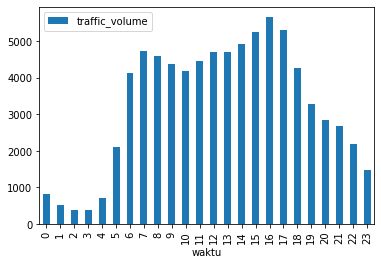

In [33]:
dfg.plot.bar(x='waktu',y='traffic_volume')

In [34]:

data_proses=data1.drop(['traffic_volume'],axis=1)
X=data_proses.drop(['bined-traffic_vol'],axis=1)
Y=data_proses['bined-traffic_vol']

In [35]:
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,waktu,hari_Friday,hari_Monday,hari_Saturday,hari_Sunday,hari_Thursday,hari_Tuesday,hari_Wednesday
0,7,288.28,0.0,0.0,40,1,24,9,0,0,0,0,0,1,0
1,7,289.36,0.0,0.0,75,1,2,10,0,0,0,0,0,1,0
2,7,289.58,0.0,0.0,90,1,19,11,0,0,0,0,0,1,0
3,7,290.13,0.0,0.0,90,1,19,12,0,0,0,0,0,1,0
4,7,291.14,0.0,0.0,75,1,2,13,0,0,0,0,0,1,0


In [36]:
Y

0        tinggi
1        sedang
2        sedang
3        tinggi
4        tinggi
          ...  
48199    sedang
48200    sedang
48201    rendah
48202    rendah
48203    rendah
Name: bined-traffic_vol, Length: 48204, dtype: category
Categories (3, object): ['rendah' < 'sedang' < 'tinggi']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [38]:
clas = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(n_neighbors = 3),
    'Gaussian Naive Bayes' : GaussianNB(),
    'Perceptron' : Perceptron(),
    'Linear SVC' : LinearSVC(),
    'Stochastic Gradient Descent' : SGDClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
   
}
error=pd.DataFrame(columns=['score'])
for i,j in clas.items():
    j.fit(X_train,Y_train)
    pred = j.predict(X_test)
    error.loc[i]= [round(j.score(X_test, Y_test) * 100, 2)]
error

c:\users\zaina\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\zaina\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,score
Logistic Regression,54.09
Support Vector Machines,55.00
K-nearest Neighbors,80.38
Gaussian Naive Bayes,53.15
Perceptron,54.18
Linear SVC,41.69
Stochastic Gradient Descent,48.69
Decision Tree,88.29


In [39]:
DecisionTreeClassifier().fit(X_train,Y_train)
pred = j.predict(X_test)
[round(j.score(X_test, Y_test) * 100, 2)]

[88.29]

In [40]:
pred

array(['tinggi', 'sedang', 'rendah', ..., 'tinggi', 'sedang', 'rendah'],
      dtype=object)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      rendah       0.94      0.93      0.94      5108
      sedang       0.84      0.85      0.85      5422
      tinggi       0.87      0.86      0.86      3932

    accuracy                           0.88     14462
   macro avg       0.88      0.88      0.88     14462
weighted avg       0.88      0.88      0.88     14462

